In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from IPython.display import display, Markdown

In [2]:
%matplotlib inline

# 3. Exploration

Pour commencer, nous importons la base de données.

In [3]:
FoodData = pd.read_feather('data/FoodData_wrangled.feather')

In [4]:
FoodData.head()

,code,url,last_modified_datetime,image_small_url,product_name,quantity,pnns_groups_1,pnns_groups_2,food_groups,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,0000000000100,http://world-fr.openfoodfacts.org/produit/0000...,2015-10-12 14:13:32+00:00,https://images.openfoodfacts.org/images/produc...,moutarde au moût de raisin,100.0,Fat and sauces,Dressings and sauces,en:dressings-and-sauces,d,223.559759,8.2,2.2,29.0,22.0,5.1,4.600,1.840
1,0000000000949,http://world-fr.openfoodfacts.org/produit/0000...,2019-08-08 12:46:52+00:00,https://images.openfoodfacts.org/images/produc...,Salade de carottes râpées,NaN,Composite foods,One-dish meals,en:one-dish-meals,b,32.000000,0.3,0.1,5.3,3.9,0.9,0.420,0.168
2,000000000114,http://world-fr.openfoodfacts.org/produit/0000...,2021-01-06 15:00:29+00:00,https://images.openfoodfacts.org/images/produc...,Chocolate n 3,80.0,unknown,unknown,None,None,582.545142,44.0,28.0,30.0,27.0,2.1,0.025,0.010
3,0000000001281,http://world-fr.openfoodfacts.org/produit/0000...,2022-02-11 08:24:48+00:00,https://images.openfoodfacts.org/images/produc...,Tarte noix de coco,NaN,Sugary snacks,Biscuits and cakes,en:biscuits-and-cakes,d,381.000000,22.0,15.5,27.3,21.9,4.6,0.100,0.040
4,0000000001885,http://world-fr.openfoodfacts.org/produit/0000...,2018-02-08 21:48:11+00:00,https://images.openfoodfacts.org/images/produc...,Compote de poire,NaN,Fruits and vegetables,Fruits,en:fruits,a,157.000000,0.0,0.0,36.0,27.0,0.6,0.000,0.000


In [5]:
FoodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360574 entries, 0 to 360573
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   code                    360574 non-null  object             
 1   url                     360574 non-null  object             
 2   last_modified_datetime  360574 non-null  datetime64[ns, UTC]
 3   image_small_url         348698 non-null  object             
 4   product_name            359507 non-null  object             
 5   quantity                216515 non-null  float64            
 6   pnns_groups_1           360574 non-null  object             
 7   pnns_groups_2           360574 non-null  object             
 8   food_groups             294259 non-null  object             
 9   nutriscore_grade        312568 non-null  object             
 10  energy-kcal_100g        360574 non-null  float64            
 11  fat_100g                36

## 3.1. Analyse univariée

Nous pouvons désormais débuter l'analyse univariée, en commençant par un box plot par indicateur.

In [6]:
numeric_fields = FoodData.columns[FoodData.columns.str.contains(r"_100g")].tolist()

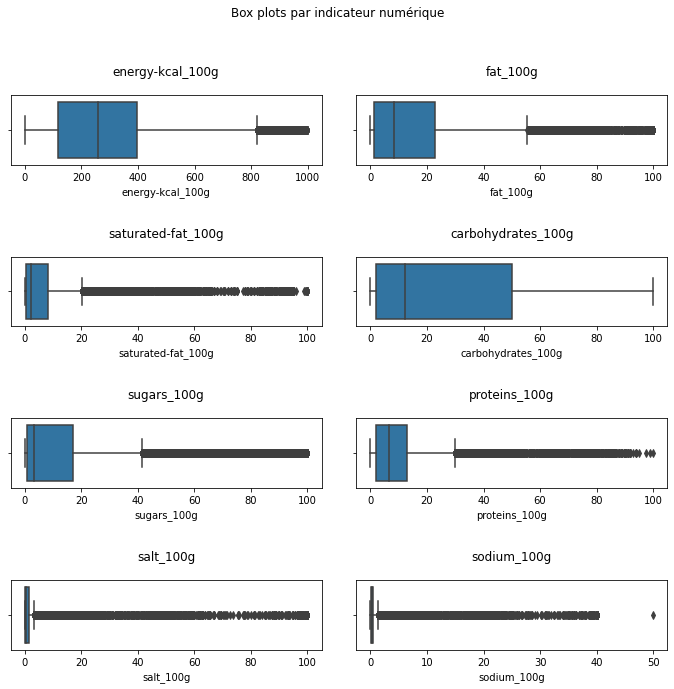

In [7]:
fig, axs = plt.subplots(4,2, figsize = (10,10))

plt.suptitle("Box plots par indicateur numérique")

for col, ax in zip(numeric_fields, fig.axes):

    sns.boxplot(x = FoodData.loc[:,col], ax = ax)
    ax.set_title(f"{col}", pad = 20)

fig.tight_layout(pad = 3)

plt.savefig('figures/box.png', format = 'png', bbox_inches = "tight")

plt.show()

Nous pouvons également étudier les histogrammes pour chacun de ces indicateurs.

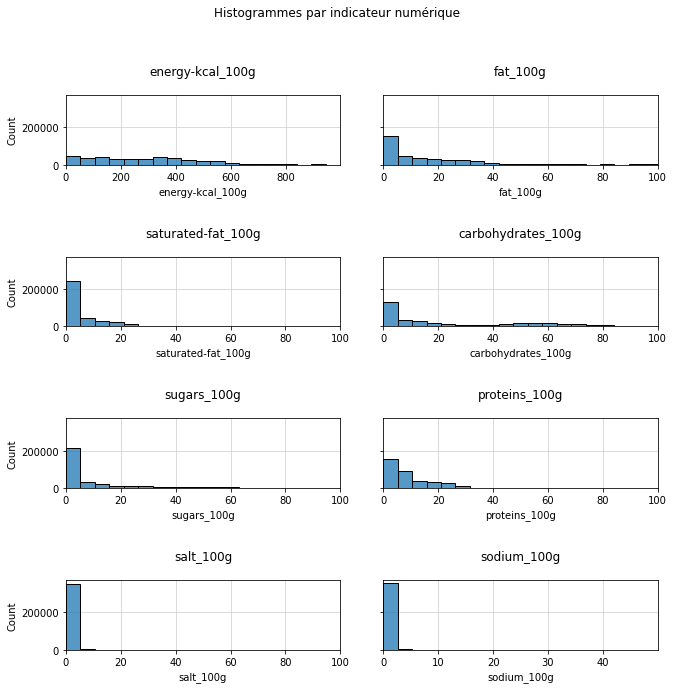

In [8]:
bins = round(1 + np.log2(FoodData.shape[0]))

fig, axs = plt.subplots(4,2, figsize = (10,10), sharey = True)

plt.suptitle("Histogrammes par indicateur numérique")

for col, ax in zip(numeric_fields, fig.axes):
    
    sns.histplot(x = FoodData.loc[:,col], ax = ax, bins = bins)
    ax.set_title(f"{col}", pad = 20)
    ax.set_axisbelow(True)
    ax.grid(visible = True, color = 'lightgrey')
    ax.set_xlim(left = FoodData.loc[:,col].min(), right = FoodData.loc[:,col].max())

fig.tight_layout(pad = 3)

plt.savefig('figures/hist.png', format = 'png', bbox_inches = "tight")
    
plt.show()

Nous observons des distributions différentes pour chaque indicateur, mais également, pour certains d'entre eux au moins (énergie, glucides, sucres) plusieurs modes potentiels qui apparaissent.

## 3.2. Analyse multivariée

### 3.2.1. Corrélation entre indicateurs

Nous allons maintenant nous intéresser à étudier la corrélation entre les indicateurs. Cela pourra nous notamment donner une idée sur la manière de compléter les données manquantes.

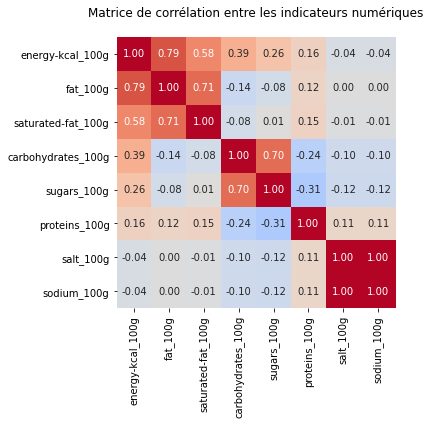

In [9]:
FoodData_corr = FoodData[numeric_fields].corr()

fig, ax = plt.subplots(figsize = (5,5))

sns.heatmap(
    data = FoodData_corr,
    center = 0,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    cbar = False
)

ax.set_title("Matrice de corrélation entre les indicateurs numériques", pad = 20)

plt.savefig('figures/corr_matrix.png', format = 'png', bbox_inches = 'tight')

plt.show()

En complément, nous pouvons tester l'hypothèse nulle pour chacune de ces corrélations, c'est à dire l'hypothèse que, pour chaque paire d'indicateurs, les données de notre base auraient pu être générées par des distributions non-corrélées.

In [10]:
def df_corr_pvalues(data):
    
    '''
    Fonction calculant la p-value de l'hypothèse nulle pour chaque paire d'indicateurs
    d'un dataframe contenant uniquement des valeurs numériques (ou NaN).
    '''
    
    data = data.dropna()
    columns = pd.DataFrame(columns = data.columns, dtype = 'float64')
    data_pvalues = columns.transpose().join(columns)
    
    for index in columns:
        for row in columns:
            data_pvalues.loc[index, row] = stats.pearsonr(data[index], data[row])[1]
    
    return data_pvalues

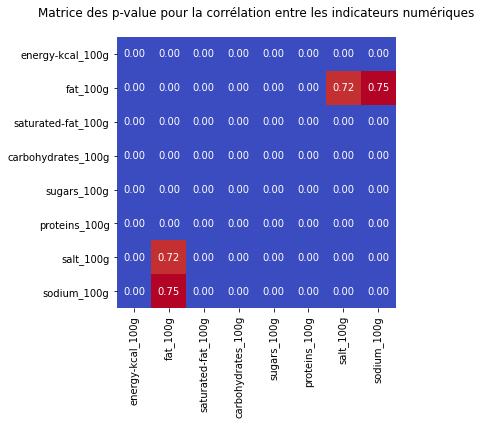

In [11]:
FoodData_corr_pvalue = df_corr_pvalues(FoodData[numeric_fields])

fig, ax = plt.subplots(figsize = (5,5))

sns.heatmap(
    data = FoodData_corr_pvalue,
    annot = True,
    fmt = '.2f',
    cmap = 'coolwarm',
    cbar = False
)

ax.set_title("Matrice des p-value pour la corrélation entre les indicateurs numériques", pad = 20)

plt.show()

Nous pouvons notamment observer que les indicateurs relatifs au sel et au sodium sont totalement corrélés. Cela correspond bien à notre attente, car nous savons que le sodium doit représenter 40% du poids du sel. Pour le vérifier, nous pouvons observer un scatter plot d'un de ces indicateurs face à l'autre.

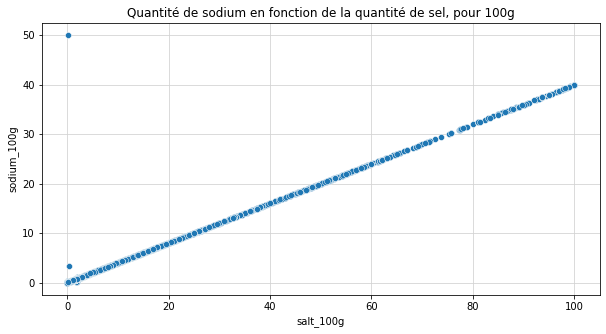

In [12]:
fig, ax = plt.subplots(figsize = (10,5))

sns.scatterplot(
    x = FoodData['salt_100g'],
    y = FoodData['sodium_100g']
)

ax.set_axisbelow(True)

ax.grid(visible = True, color = "lightgrey")

ax.set_title("Quantité de sodium en fonction de la quantité de sel, pour 100g")

plt.show()

In [13]:
FoodData.loc[FoodData['sodium_100g']>0.5*FoodData['salt_100g'],['sodium_100g', 'salt_100g', 'url']].sample(5).values

array([[3.32, 0.43688,
        'http://world-fr.openfoodfacts.org/produit/3700029201880/falafels-maayane'],
       [0.002, 5e-06,
        'http://world-fr.openfoodfacts.org/produit/8015602000435/penne-seche-a-basse-temperature-la-bio-idea'],
       [1.16, 2.0,
        'http://world-fr.openfoodfacts.org/produit/3273120019635/japanes-style-noodles-udon'],
       [0.4, 0.3,
        'http://world-fr.openfoodfacts.org/produit/5055958700224/chocolate-pretzel-dippers-graze-29-g'],
       [0.004, 0.0,
        'http://world-fr.openfoodfacts.org/produit/0014113911658/pistaches-grillees-sans-sel-wonderful']],
      dtype=object)

Une analyse d'un échantillon des saisies décalées par rapport à la droite montre qu'il s'agit d'erreurs de saisies. Nous les retirons donc de la base de données.

In [14]:
FoodData = FoodData[FoodData['sodium_100g']<=0.5*FoodData['salt_100g']]

Nous allons utilisons également cette relation pour compléter d'éventuelles valeurs manquantes.

In [15]:
map_salt = (FoodData['salt_100g'].notna())&(FoodData['sodium_100g'].isna())
FoodData.loc[map_salt, 'sodium_100g'] = 0.4*FoodData.loc[map_salt, 'salt_100g']

In [16]:
map_salt = (FoodData['sodium_100g'].notna())&(FoodData['salt_100g'].isna())
FoodData.loc[map_salt, 'salt_100g'] = 2.5*FoodData.loc[map_salt, 'sodium_100g']

De par sa totale corrélation avec l'indicateur sur le sel, l'indicateur sur le sodium ne pourra pas nous apporter davantage d'information que celui du sel. Nous le retirons donc de notre analyse pour la suite.

Nous avons également pu observer que l'indicateur du sel est le seul dont le coefficient de corrélation avec un autre indicateur n'est pas matériel (r >= 0.3). En préparation de la suite, nous créons une liste d'indicateurs qui ont des corrélations par paire.

In [17]:
numeric_fields.remove('sodium_100g')
corr_fields = numeric_fields.copy()
corr_fields.remove('salt_100g')

### 3.2.2. Exploration des catégories de produits

Nous pouvons nous intéresser un moment aux catégories de produits contenues dans notre base de données. Ces catégories sont principalement contenues dans les indicateurs `pnns_groups_1` et `pnns_groups_2`.

In [18]:
food_groups = FoodData.loc[:,['pnns_groups_1','pnns_groups_2']].drop_duplicates().sort_values(by = ['pnns_groups_1','pnns_groups_2'])
food_groups

,pnns_groups_1,pnns_groups_2
2664,Alcoholic beverages,Alcoholic beverages
448,Beverages,Artificially sweetened beverages
14,Beverages,Fruit juices
1278,Beverages,Fruit nectars
600,Beverages,Plant-based milk substitutes
33,Beverages,Sweetened beverages
312,Beverages,Teas and herbal teas and coffees
34,Beverages,Unsweetened beverages
647,Beverages,Waters and flavored waters
8,Cereals and potatoes,Bread


Une catégorie `unknown` représente en réalité les produits pour lesquels la classification n'est pas saisie.

Afin d'éviter des problèmes de caractères, nous passons tous les éléments en minuscule et remplaçons la ponctuation.

In [19]:
FoodData.loc[:,['pnns_groups_1','pnns_groups_2']] = FoodData.loc[:,['pnns_groups_1','pnns_groups_2']].applymap(lambda x: x.lower().replace("-"," "))
food_groups = FoodData.loc[:,['pnns_groups_1','pnns_groups_2']].drop_duplicates().sort_values(by = ['pnns_groups_1','pnns_groups_2'])
food_groups.set_index('pnns_groups_2', inplace = True)

Nous pouvons également observer les éléments indiqués dans l'indicateur `food_groups`. Ceux-ci sont les mêmes que les éléments saisis dans les 2 catégories précédentes, à quelques différences près.

In [20]:
FoodData['food_groups'].unique()

array(['en:dressings-and-sauces', 'en:one-dish-meals', None,
       'en:biscuits-and-cakes', 'en:fruits', 'en:cheese', 'en:poultry',
       'en:bread', 'en:fish-and-seafood', 'en:salty-and-fatty-products',
       'en:fruit-juices', 'en:sweets', 'en:fats', 'en:dairy-desserts',
       'en:pizza-pies-and-quiches', 'en:sweetened-beverages',
       'en:unsweetened-beverages', 'en:cereals', 'en:nuts',
       'en:appetizers', 'en:meat-other-than-poultry', 'en:pastries',
       'en:dried-fruits', 'en:vegetables', 'en:breakfast-cereals',
       'en:processed-meat', 'en:sandwiches', 'en:legumes',
       'en:milk-and-yogurt', 'en:teas-and-herbal-teas-and-coffees',
       'en:soups', 'en:potatoes', 'en:chocolate-products',
       'en:artificially-sweetened-beverages',
       'en:plant-based-milk-substitutes', 'en:offals', 'en:fatty-fish',
       'en:ice-cream', 'en:fruit-nectars', 'en:fruits-and-vegetables',
       'en:eggs', 'en:alcoholic-beverages',
       'en:waters-and-flavored-waters', 'en:ce

Nous pouvons également observer que certains produits de la catégorie `unknown` ont néanmoins une information saisie dans l'indicateur `food_groups`. Nous allons chercher à l'utiliser pour compléter quelques informations sur les 2 autres indicateurs.

In [21]:
FoodData.loc[FoodData['pnns_groups_2']=='unknown','food_groups'].value_counts()

en:cereals-and-potatoes     264
en:unsweetened-beverages     97
en:fruits-and-vegetables     41
en:unknown                   34
en:fish-meat-eggs             5
Name: food_groups, dtype: int64

In [22]:
FoodData.loc[:,['food_groups']] = FoodData['food_groups'].str.replace("en:","").str.replace("-"," ")

Nous ne retenons que les valeurs qui existent déjà dans la colonne `pnns_groups_2`, et leur associons la valeur associée de la colonne `pnns_groups_1`.

In [23]:
replace_map = (FoodData['pnns_groups_2']=='unknown')&(FoodData['food_groups'].isin(food_groups.index))
FoodData.loc[replace_map,['pnns_groups_2']] = FoodData.loc[replace_map,'food_groups']

In [24]:
def set_pnns_groups_1(group):
    '''
    Fonction trouvant la catégorie associée (string) à la sous-catégorie saisie en group (string).
    '''
    return food_groups.loc[group, 'pnns_groups_1']

In [25]:
replace_map = ~FoodData['pnns_groups_2'].isin(food_groups.index)
FoodData.loc[replace_map,['pnns_groups_2']] = 'unknown'

In [26]:
replace_map_unknown = (FoodData['pnns_groups_1']=='unknown')&(FoodData['pnns_groups_2']!='unknown')
replace_map_nan = (FoodData['pnns_groups_1'].isna())&(FoodData['pnns_groups_2']!='unknown') 
FoodData.loc[replace_map_unknown|replace_map_nan, 'pnns_groups_1'] = FoodData.loc[replace_map_unknown|replace_map_nan, 'pnns_groups_2'].map(set_pnns_groups_1)

Nous n'avons plus besoin de la colonne `food_groups` et pouvons donc la retirer.

In [27]:
FoodData.drop('food_groups', axis = 1, inplace = True)

### 3.2.3. Box plots par catégorie

Nous allons visualiser, sous forme de bar chart, le nombre de produits par catégorie.

In [28]:
group_field = 'pnns_groups_2'

Pour faciliter la lecture, nous définissons un code couleur pour chaque catégorie.

In [29]:
groups = FoodData[group_field].value_counts().index.tolist()
colors = sns.color_palette("hls",n_colors = len(groups))

c_palette = dict()

for group, color in zip(groups, colors):
    c_palette.update({group: color})

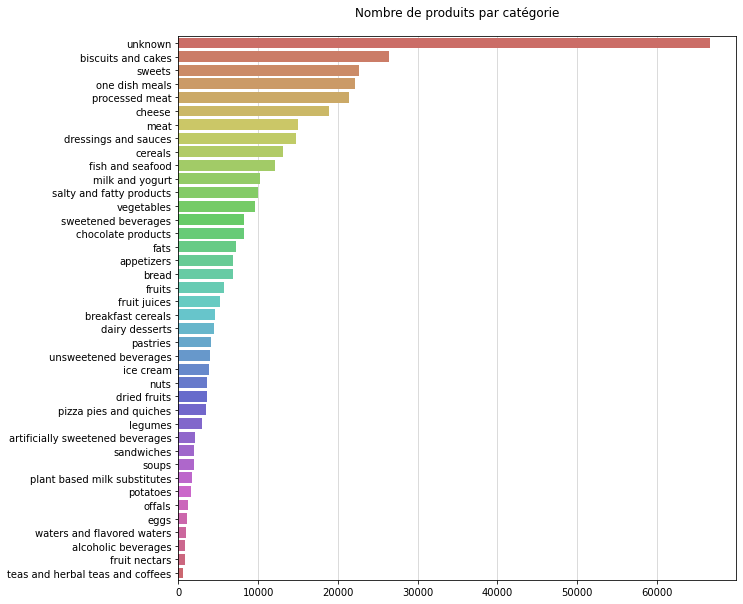

In [30]:
fig, ax = plt.subplots(figsize = (10,10))

sns.barplot(
    x = FoodData[group_field].value_counts().values,
    y = FoodData[group_field].value_counts().index,
    palette = c_palette
)

ax.set_title("Nombre de produits par catégorie", pad  = 20)

ax.set_axisbelow(True)

ax.grid(visible = True, axis = "x", color = 'lightgrey')

plt.show()

Nous visualisons ensuite les box plots pour chaque indicateur numérique, par catégorie de produit, afin d'observer la distribution des différents indicateurs en fonction de la catégorie.

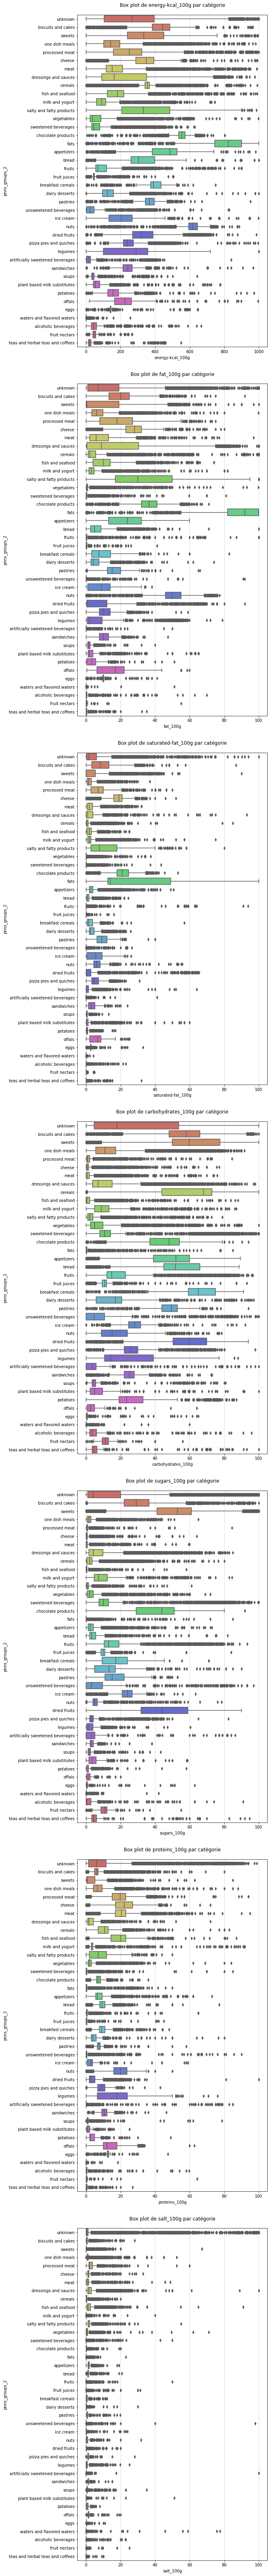

In [31]:
fig, axes = plt.subplots(nrows = len(numeric_fields), figsize = (10,90))

for col, ax in zip(numeric_fields, axes):    
    sns.boxplot(
        data = FoodData,
        y = group_field,
        x = col,
        ax = ax,
        palette = c_palette,
        order = groups
    )
    
    ax.set_title(f"Box plot de {col} par catégorie", pad = 20)
    
    ax.set_axisbelow(True)
    
    ax.grid(visible = True, axis = "x", color = 'lightgrey')

fig.tight_layout(pad = 3)

plt.show()

Nous pouvons observer des distributions différentes entre catégories de produits.

### 3.2.4. Traitement initial de la catégorie "unknown"

De ces box plots, nous pouvons notamment observer une très grande dispersion au sein de la catégorie `unknown`. Comme nous l'avons dit, celle-ci correspond à des produits pour lesquels la catégorisation n'a pas été saisie. Cette absence de saisie peut s'expliquer de 2 manières :
- oubli de la part du saisisseur
- absence de catégorie adéquate pour le produit

C'est sur la seconde possibilité que nous allons commencer à nous pencher. Pour cela, nous allons nous intéresser aux valeurs extrêmes sur certains indicateurs.

In [32]:
def group_counter(data, group_field, indicator, indicator_thresh):
    '''
    Fonction donnant les éléments de group_field et
    le nombre de fois où ils apparaissent d'un dataframe data, 
    sous la condition que la colonne indicator soit supérieure à indicator_thresh.  
    '''
    return data.loc[data[indicator]>=indicator_thresh,group_field].value_counts()

In [33]:
def group_explorer(data, group_field, group, indicator, indicator_thresh, name_field, name_strings):
    
    '''
    Fonction identifiant le ratio d'éléments du dataframe data
    dont la colonne name_field contient certains mots clés name_strings,
    suivant la condition que la colonne indicator soit supérieure à indicator_thresh.
    '''
    
    group = pd.Series(group)
        
    contains_string = '|'.join(pd.Series(name_strings).str.lower())
    
    subset_names = data.loc[(data[group_field].isin(group))&(data[indicator]>=indicator_thresh),name_field]
    subset_names_has_strings = subset_names.str.lower().str.contains(contains_string)
    
    if subset_names.shape[0]:
        subset_share_has_strings = subset_names_has_strings.sum()/subset_names.shape[0]
    else:
        subset_share_has_strings = 0
    
    return subset_share_has_strings

In [34]:
def group_explorer_vis(data, group_field, group, indicator, name_field, name_strings):
    
    '''
    Fonction montrant une représentation graphique de plusieurs group_explorer() 
    appliqués à des valeurs de indicator_thresh comprises entre 50 et 100 avec un pas de 5.
    '''
    
    threshold = []
    n_strings = []

    for n in np.arange(50,105,5):
        threshold.append(n)
        n_strings.append(group_explorer(FoodData, group_field, group, indicator, n, name_field, name_strings))

    filter_df = pd.DataFrame({
        "Indicateur supérieur à": threshold,
        "Ratio des produits retenus": n_strings
    })

    display(filter_df)

    filter_df.plot(
        kind = 'scatter',
        x = "Indicateur supérieur à", 
        y = "Ratio des produits retenus", 
        title = "Ratio des produits retenus en fonction de la limite inférieure de l'indicateur",
        grid = True
    )

    plt.show()

Nous allons observer dans quelles catégories sont distribuées les valeurs extrêmes en :
- Sucres pour 100g
- Graisses pour 100g
- Sel pour 100g
- Protéines pour 100g

In [35]:
group_counter(FoodData, group_field, 'sugars_100g', 90)

sweets                              968
unknown                             329
biscuits and cakes                   78
sweetened beverages                  28
unsweetened beverages                 5
teas and herbal teas and coffees      2
alcoholic beverages                   1
chocolate products                    1
dairy desserts                        1
fruits                                1
dried fruits                          1
Name: pnns_groups_2, dtype: int64

Les éléments contenant plus de 90% de sucre en masse sont majoritairement classés en `sweets`. Il n'y a donc pas besoin de créer une nouvelle catégorie pour ceux-ci.

In [36]:
group_counter(FoodData, group_field, 'fat_100g', 90)

fats                        5179
unknown                      221
cereals                      206
dressings and sauces          21
salty and fatty products      10
sweets                         4
fruits                         3
vegetables                     3
unsweetened beverages          2
biscuits and cakes             1
one dish meals                 1
bread                          1
dried fruits                   1
meat                           1
Name: pnns_groups_2, dtype: int64

Les éléments contenant plus de 90% de graisses en masse sont majoritairement classés en `fats`. Il n'y a donc pas besoin de créer une nouvelle catégorie pour ceux-ci.

In [37]:
group_counter(FoodData, group_field, 'salt_100g', 90)

unknown                             170
dressings and sauces                  1
unsweetened beverages                 1
fish and seafood                      1
artificially sweetened beverages      1
Name: pnns_groups_2, dtype: int64

Pour le sel, les valeurs extrêmes se trouvent presque exclusivement dans la catégorie `unknown`. Nous pouvons en déduire qu'il est utile de créer une catégorie dédiée au sel, car aucune catégorie existante ne lui est associée.

Nous allons tenter de définir un seuil de composition en sel au delà duquel nous attribuerons une catégorie dédiée. Pour cela, nous observons le ratio du nombre de produits dont le nom contient du vocabulaire identifiant le sel par rapport au nombre de produits totaux, en utilisant des planchers successifs de composition en sel.

,Indicateur supérieur à,Ratio des produits retenus
0,50,0.444988
1,55,0.555556
2,60,0.684615
3,65,0.762931
4,70,0.793578
5,75,0.806604
6,80,0.818627
7,85,0.834197
8,90,0.847059
9,95,0.881944


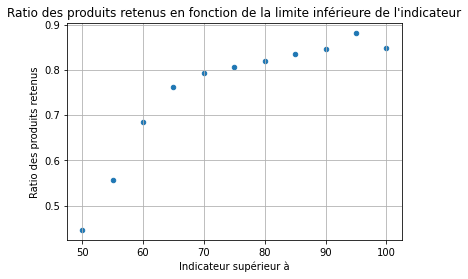

In [38]:
group_explorer_vis(FoodData, group_field, 'unknown', 'salt_100g', 'product_name', ['salt', 'sel'])

Sur cette base, nous allons créer une nouvelle sous-catégorie `salts`, dans la catégorie `salty snacks`, que nous allons attribuer à tous les produits de la catégorie `unknown` contenant plus de 75% de sel en masse.

In [39]:
FoodData.loc[(FoodData[group_field]=='unknown')&(FoodData['salt_100g']>75),['pnns_groups_1',group_field]] = ["salty snacks", 'salts']

In [40]:
group_counter(FoodData, group_field, 'proteins_100g', 75)

unknown                             462
milk and yogurt                      25
artificially sweetened beverages     13
unsweetened beverages                 5
processed meat                        5
fish and seafood                      4
one dish meals                        4
cereals                               4
meat                                  3
vegetables                            2
dried fruits                          2
dairy desserts                        2
sweetened beverages                   2
soups                                 1
bread                                 1
sweets                                1
biscuits and cakes                    1
legumes                               1
Name: pnns_groups_2, dtype: int64

Pour les protéines, les valeurs extrêmes se trouvent presque exclusivement dans la catégorie `unknown`. Nous pouvons en déduire qu'il est utile de créer une catégorie dédiée aux compléments protéinés, car aucune catégorie existante ne leur sont associés.

Nous allons tenter de définir un seuil de composition en protéines au delà duquel nous attribuerons une catégorie dédiée. Pour cela, nous observons le ratio du nombre de produits dont le nom contient du vocabulaire identifiant les compléments protéinés par rapport au nombre de produits totaux, en utilisant des planchers successifs de composition en protéines.

,Indicateur supérieur à,Ratio des produits retenus
0,50,0.486916
1,55,0.512397
2,60,0.538803
3,65,0.610677
4,70,0.714744
5,75,0.770563
6,80,0.755639
7,85,0.666667
8,90,0.575758
9,95,0.000000


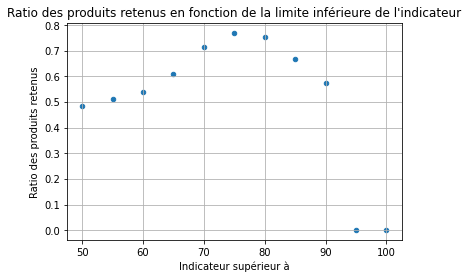

In [41]:
group_explorer_vis(FoodData, group_field, 'unknown', 'proteins_100g', 'product_name', ['whey', 'protein', "isolate"])

Sur cette base, nous allons créer une nouvelle sous-catégorie `protein complements`, dans la catégorie `beverages`, que nous allons attribuer à tous les produits de la catégorie `unknown` contenant plus de 70% de protéines en masse.

In [42]:
FoodData.loc[(FoodData[group_field]=='unknown')&(FoodData['proteins_100g']>70),['pnns_groups_1',group_field]] = ["beverages", 'protein complements']

Nous re-générons le tableau des catégories et sous-catégories, en tenant compte de ces deux nouvelles entrées.

In [43]:
food_groups = FoodData.loc[:,['pnns_groups_1','pnns_groups_2']].drop_duplicates().sort_values(by = ['pnns_groups_1','pnns_groups_2'])
food_groups.set_index('pnns_groups_2', inplace = True)

Afin de prendre en compte ces nouvelles catégories dans les visualisations, il nous est également nécessaire de leur attribuer un code couleur, et de les intégrer dans la liste des groupes.

In [44]:
groups_add = ['salts', 'protein complements']
colors_add = colors = sns.color_palette("colorblind",n_colors = len(groups_add))

for group, color in zip(groups_add, colors_add):
    c_palette.update({group: color})
    
groups.extend(groups_add)

### 3.2.5. ANOVA

De la première visualisation de la distribution de chaque indicateur par catégorie, nous avions conclu qu'il est probable que la catégorie de l'aliment ait un impact sur la valeur moyenne et la variance de chaque indicateur. Nous allons nous intéresser à cet impact potentiel au travers d'une ANOVA entre les catégories de produitsn pour chaque indicateur.

In [45]:
def anova_test(data, group_field, indicator, excluded_group = None):
    
    '''
    Fonction calculant les éléments d'analyse ANOVA pour un ensemble de données numériques contenues dans un dataframe.
    
    Paramètres:
    -----------
    - data : dataframe contenant les données numériques à évaluer
    - group_field : nom (str) de la colonne de data contenant les catégories à utiliser pour l'ANOVA
    - indicator = nom (str) de la colonne contenant l'indicateur numérique pour lequel l'ANOVA est réalisé
    - excluded_groups = optionnel, nom (str) d'une catégorie (élément de la colonne group_field) à exclure
    
    Résultat:
    ---------
    - valeur du eta^2 = SCE/SCT calculé
    - p_value de l'hypothèse nulle estimée sur la base d'une analyse ANOVA unidimensionnelle (certaines conditions statistiques requises)
    - p_value de l'hypothèse nulle estimée sur la base d'une analyse Alexander-Govern unidimensionnelle (conditions similaires hors homoscédasticité)
    '''
    
    groups_values = []

    ind_mean = data[indicator].mean(skipna = True)
    groups = data[group_field].unique().tolist()
    
    if excluded_group is not None and excluded_group in groups:
        groups.remove(excluded_group)
    
    non_constant_groups = groups.copy()

    for group in groups:

        mapping = (data[group_field]==group)&(data[indicator].notna())
        mapping_ind = data[indicator].notna()
        data_group = data.loc[mapping, indicator]

        groups_values.append({
            'n_i': len(data_group),
            'group_mean': data_group.mean()
        })      

        if len(data_group.unique()) == 1:
            non_constant_groups.remove(group)

    SCT = sum([(value_ind - ind_mean)**2 for value_ind in data.loc[mapping_ind,indicator]])
    SCE = sum([group['n_i']*(group['group_mean'] - ind_mean)**2 for group in groups_values])

    # Calcul de la p-value de H0 avec méthode ANOVA one-way
    p_val_anova = stats.f_oneway(*[data.loc[data[group_field]==group, indicator].dropna() for group in groups]).pvalue
    # Calcul de la p-value de H0 avec méthode Alexander-Govern (ne nécessitant pas l'hypothèse d'homoscédasticité)
    p_val_alexgovern = stats.alexandergovern(*[data.loc[data[group_field]==group, indicator] for group in non_constant_groups], nan_policy = 'omit').pvalue

    return SCE/SCT, p_val_anova, p_val_alexgovern

In [46]:
anova_test_table = []

for indicator in numeric_fields:
    
    eta_squared, p_val_anova, p_val_alexgovern = anova_test(FoodData, group_field, indicator, 'unknown')
    
    anova_test_table.append({
        'Indicateur': indicator,
        'Rapport de corrélation': eta_squared,
        'p-value (ANOVA)': p_val_anova,
        'p-value (Alexander-Govern)': p_val_alexgovern
    })
    
pd.DataFrame(anova_test_table)

,Indicateur,Rapport de corrélation,p-value (ANOVA),p-value (Alexander-Govern)
0,energy-kcal_100g,0.537911,0.0,0.0
1,fat_100g,0.568242,0.0,0.0
2,saturated-fat_100g,0.443399,0.0,0.0
3,carbohydrates_100g,0.594652,0.0,0.0
4,sugars_100g,0.533167,0.0,0.0
5,proteins_100g,0.564418,0.0,0.0
6,salt_100g,0.502124,0.0,0.0


Nous observons que les rapports de corrélation sont significatifs pour toutes nos variables numériques, et que les p-values associées sont proches de 0 dans tous les cas. Nous pouvons en déduire que l'hypothèse nulle, c'est à dire "les indicateurs suivent chacun une seule distribution commune à toutes les catégories d'aliments" peut être rejetée, et donc que la catégorie du produit peut donner une information sur la distribution de l'indicateur.

Nous utiliserons cette conclusion pour traiter les outliers et les valeurs manquantes.

### 3.2.6. Traitement des outliers

Nous pouvons désormais nous intéresser aux outliers de notre base de données. Nous allons procéder par sous-catégorie d'aliments, en utilisant une approche de Tukey pour estimer les données outliers. Il convient néanmoins de traiter la catégorie `unknown` séparément, car elle reste à ce stade hétérogène, en contenant des aliments de tous types.

In [47]:
def tukey_data_outliers(data, indicator, group_field, n_IQR = 1.5):
    
    '''
    Fonction calculant les bornes supérieures et inférieures d'outliers d'un ensemble de distributions, sur la base de l'approche de Tukey.
    
    Paramètres
    ----------
    data : données à utiliser, format DataFrame.
    indicator : colonnes contenant les indicateurs numériques pour lesquelles les bornes sont recherchées.
    group_field : colonne contenant l'indicateur à utiliser pour grouper les données.
    n_IQR : nombre d'écarts interquartiles à utiliser pour estimer les bornes.
    
    Résultat
    --------
    2 DataFrames de dimension (len(data.group_field.unique()))*len(indicator) contenant respectivement les bornes inférieures et supérieures.
    
    '''
    
    mapping = pd.Series(group_field).append(pd.Series(numeric_fields))
    
    data_q75 = data.loc[:,mapping].groupby(group_field).quantile(0.75)
    data_q25 = data.loc[:,mapping].groupby(group_field).quantile(0.25)
    data_IQR = data_q75 - data_q25
    
    outlier_min = np.maximum(data_q25 - n_IQR*data_IQR,0)
    outlier_max = data_q75 + n_IQR*data_IQR
    
    return outlier_min, outlier_max

In [48]:
outlier_min, outlier_max = tukey_data_outliers(FoodData, numeric_fields, group_field, 1.5)

D'après notre analyse en 2.4.5., nous avons déduit que certaines catégories existantes ou nouvellement crées contiennent des produits qui peuvent être purs. Pour chacune d'entre elles, nous forçons le maximum à 100g / 100g d'aliment.

In [49]:
outlier_max.loc[outlier_max.index == 'salts', 'salt_100g'] = 100
outlier_max.loc[outlier_max.index == 'sweets', 'sugars_100g'] = 100
outlier_max.loc[outlier_max.index == 'fats', 'fat_100g'] = 100
outlier_max.loc[outlier_max.index == 'protein complements', 'proteins_100g'] = 100

In [50]:
outlier_max.head()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
pnns_groups_2,,,,,,,
alcoholic beverages,106.00,1.50,0.25000,12.00,6.88,1.365,0.100
appetizers,740.50,60.50,6.90000,91.50,8.85,14.750,3.100
artificially sweetened beverages,62.75,0.25,0.00000,14.35,12.75,0.250,0.125
biscuits and cakes,636.50,42.70,28.18875,93.00,58.00,10.550,1.600
bread,600.00,18.00,3.65000,97.35,11.00,15.500,2.250


Nous pouvons désormais utiliser ces outliers pour traiter les données de notre base. Nous choisissons de borner les données saisies : si la donnée est supérieure (inférieure respecteueusement), elle est alors ramenée à la borne supérieure (inférieure respectueusement) des données hors outliers.

Pour illustrer l'impact du traitement des outliers, nous comparerons les box plots avant et après traitement sur une catégorie, par exemple `sugars_100g`.

In [51]:
FoodData_sugars = FoodData.loc[:,[group_field, 'sugars_100g']]
FoodData_sugars.rename(columns = {'sugars_100g': 'Valeurs brutes'}, inplace = True)

In [52]:
def outliers_group_replacement(data, group_field, excluded_group_fields, outlier_fields, outlier_min, outlier_max):

    '''
    Fonction filtrant les données contenues dans un DataFrame pour capper les outliers.
    
    Paramètres
    ----------
    data : données à utiliser, format DataFrame de dimension n*c.
    group_field : colonne contenant l'indicateur à utiliser pour grouper les données.
    excluded_group_fields : list ou str optionnelle contenant les groupes à ignorer pour le filtre.
    outlier_fields : itérable contenant les noms des colonnes sur lesquelles le filtre sera appliqué.
    outlier_min : DataFrame contenant les bornes inférieures de chaque indicateur pour chaque groupe; la liste des colonnes doit contenir les éléments d'outlier_fields.
    outlier_max : DataFrame contenant les bornes supérieures de chaque indicateur pour chaque groupe; la liste des colonnes doit contenir les éléments d'outlier_fields.
    
    Résultat
    --------
    DataFrame de dimension (n-lignes filtrées)*c contenant les données dont les outliers ont été bornés.
    
    '''
    
    fields = np.append(np.array(group_field),np.array(outlier_fields))
    data = data.loc[:,fields]
    
    excluded_group_fields = np.array(excluded_group_fields)

    for group in data[group_field].unique():
        
        group_map = data[group_field]==group
        data_indicator = data.loc[group_map,:]
        
        if not group in excluded_group_fields:
        
            outlier_min_indicator = outlier_min.loc[group,outlier_fields]
            outlier_max_indicator = outlier_max.loc[group,outlier_fields]

            outlier_replacement = outlier_min_indicator*(data_indicator.loc[:,outlier_fields]<outlier_min_indicator) + outlier_max_indicator*(data_indicator.loc[:,outlier_fields]>outlier_max_indicator)

            non_outliers_map = (data_indicator.loc[:,outlier_fields]>=outlier_min_indicator)&(data_indicator.loc[:,outlier_fields]<=outlier_max_indicator)

            outlier_replacement = data_indicator.loc[:,outlier_fields]*non_outliers_map + outlier_replacement

            data.loc[group_map,outlier_fields] = outlier_replacement
            
    return data[outlier_fields]

In [53]:
FoodData.loc[:,numeric_fields] = outliers_group_replacement(FoodData, group_field, "unknown", numeric_fields, outlier_min, outlier_max)

Nous visualisons le résultat sous la forme de box plots par sous-catégorie pour chaque indicateur, afin de nous assurer que les données sont désormais réparties comme nous l'attendons.

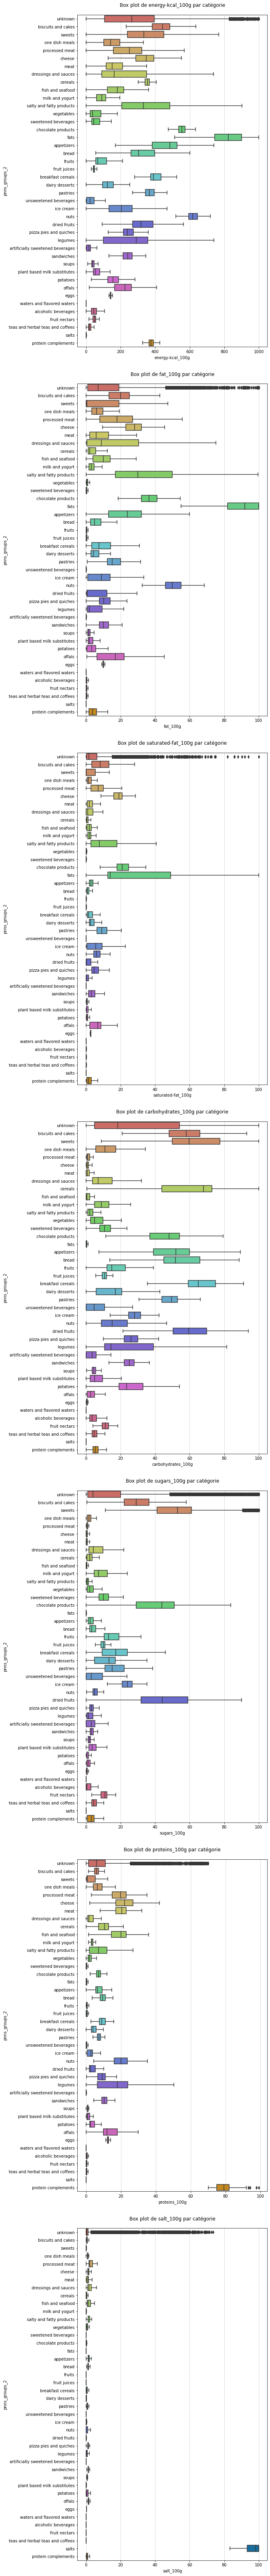

In [54]:
fig, axes = plt.subplots(nrows = len(numeric_fields), figsize = (10,90))

for col, ax in zip(numeric_fields, axes):    
    sns.boxplot(
        data = FoodData,
        y = group_field,
        x = col,
        ax = ax,
        palette = c_palette,
        order = groups
    )
    
    ax.set_title(f"Box plot de {col} par catégorie", pad = 20)
    
    ax.set_axisbelow(True)
    ax.grid(visible = True, axis = "x", color = 'lightgrey')

fig.tight_layout(pad = 3)

plt.show()

Comme en 3.2.3., nous extrayons la donnée `sugars_100g` pour illustrer l'impact de cette étape.

In [55]:
FoodData_sugars['Valeurs traitées'] = FoodData['sugars_100g']

In [56]:
FoodData_sugars

,pnns_groups_2,Valeurs brutes,Valeurs traitées
0,dressings and sauces,22.0,21.85
1,one dish meals,3.9,3.90
2,unknown,27.0,27.00
3,biscuits and cakes,21.9,21.90
4,fruits,27.0,27.00
...,...,...,...
360569,unknown,18.0,18.00
360570,cereals,0.0,0.00
360571,unknown,0.0,0.00
360572,unknown,10.4,10.40


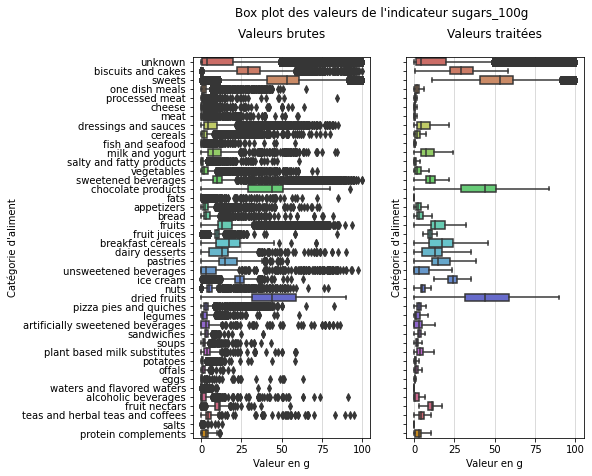

In [57]:
fig, axes = plt.subplots(ncols = 2, figsize = (7,7), sharey = True)

plt.suptitle("Box plot des valeurs de l'indicateur sugars_100g")

for col, ax in zip(['Valeurs brutes', 'Valeurs traitées'], axes):    
    sns.boxplot(
        data = FoodData_sugars,
        y = group_field,
        x = col,
        ax = ax,
        palette = c_palette,
        order = groups
    )
    
    ax.set_xlabel("Valeur en g")
    ax.set_ylabel("Catégorie d'aliment")
    
    ax.set_title(f"{col}", pad = 20)
    
    ax.set_axisbelow(True)
    ax.grid(visible = True, axis = "x", color = 'lightgrey')

plt.savefig('figures/box_plots.png', format = 'png', bbox_inches = 'tight')

plt.show()

## 3.3. Traitement des données manquantes

Notre base de données désormais nettoyée de ses valeurs outliers et aberrantes, nous pouvons tenter d'utiliser les données existantes pour compléter les données manquantes.

### 3.3.1. Données numériques manquantes

En ce qui concerne les valeurs numériques, nous allons procéder par étapes :
1. Traitement des données pour lesquelles nous avions identifié des corrélations par paires en 2.4.1.
2. Traitement des données ne présentant aucune corrélation matérielle avec d'autres données

#### 3.3.1.1. Données corrélées

Pour compléter les données manquantes au sein d'indicateurs présentant au moins une corrélation par paires significative, nous allons utiliser la fonction `IterativeImputer()` de `sklearn` pour chaque sous-catégorie. Celle-ci va en réalité effectuer une ridge regression pour chaque indicateur en fonction de tous les autres, et l'utiliser pour prédire les valeurs manquantes.

In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [59]:
def na_iter_replacer(data, group_field, excluded_group_fields, numeric_fields):

    '''
    Fonction rendant une matrice dont les valeurs manquantes ont été complétées à l'aide d'un IterativeImputer().
    
    Paramètres:
    -----------
    - data : dataframe dont certaines données manquantes doivent être estimées.
    - group_field : str représentant le nom de la colonne de data contenant les catégories selon lesquelles data doit être découpée avant d'appliquer l'IterativeImputer() à chacune d'entre elles.
    - excluded_group_fields : itérable ou str optionnelle contenant les catégories à ignorer pour l'imputation.
    - numeric_fields : itérable contenant les noms des colonnes contenant les données à utiliser pour l'IterativeImputer()
    
    Résultat:
    ---------
    dataframe contenant les valeurs numériques, sur les colonnes numeric_field, dont les valeurs manquantes ont été imputées.
    '''
    
    numeric_fields = pd.Series(numeric_fields)
    fields = np.append(np.array(group_field),numeric_fields)
    data = data.loc[:,fields]
    
    excluded_group_fields = np.array(excluded_group_fields)

    for group in data[group_field].unique():
        if group not in excluded_group_fields:
            
            imp = IterativeImputer(
                max_iter=10,
                random_state=0, 
                min_value = outlier_min.loc[group,corr_fields], 
                max_value = np.maximum(outlier_max.loc[group,corr_fields],outlier_min.loc[group,corr_fields]+0.1),
                sample_posterior = True
            )
            
            data_extract = data.loc[data[group_field] == group, numeric_fields]
            iter_replacer = imp.fit_transform(data_extract)
            
            data.loc[data[group_field]==group,numeric_fields] = iter_replacer.round(1)
            
    return data.loc[:,numeric_fields]

In [60]:
FoodData.loc[:,corr_fields] = na_iter_replacer(FoodData, group_field, 'unknown', corr_fields)

Nous nous assurons également que les valeurs prédites respectent les conditions de plafonnement établies en 2.2.1.

In [61]:
map_capping = FoodData['saturated-fat_100g']>FoodData['fat_100g']
FoodData.loc[map_capping, 'saturated-fat_100g'] = FoodData.loc[map_capping, 'fat_100g']

map_capping = FoodData['sugars_100g']>FoodData['carbohydrates_100g']
FoodData.loc[map_capping, 'sugars_100g'] = FoodData.loc[map_capping, 'carbohydrates_100g']

#### 3.3.1.2. Données faiblement corrélées

Pour les données numériques faiblement corrélées, nous allons remplacer les valeurs manquantes par la moyenne, pour chaque sous-catégorie de produits. Pour ce faire, nous utilisons la fonction `SimpleImputer()` de `sklearn`.

In [62]:
from sklearn.impute import SimpleImputer

In [63]:
def na_mean_replacer(data, group_field, excluded_group_fields, numeric_fields):
    
    '''
    Fonction rendant une matrice dont les valeurs manquantes ont été complétées à l'aide d'un SimpleImputer().
    
    Paramètres:
    -----------
    - data : dataframe dont certaines données manquantes doivent être estimées.
    - group_field : str représentant le nom de la colonne de data contenant les catégories selon lesquelles data doit être découpée avant d'appliquer le SimpleImputer() à chacune d'entre elles.
    - excluded_group_fields : itérable ou str optionnelle contenant les catégories à ignorer pour l'imputation.
    - numeric_fields : itérable ou str contenant les noms des colonnes contenant les données à utiliser pour l'SimpleImputer()
    
    Résultat:
    ---------
    dataframe contenant les valeurs numériques, sur les colonnes numeric_field, dont les valeurs manquantes ont été imputées.
    '''
    
    numeric_fields = pd.Series(numeric_fields)
    fields = np.append(np.array(group_field),numeric_fields)
    data = data.loc[:,fields]
    
    excluded_group_fields = np.array(excluded_group_fields)
    
    imp = SimpleImputer(strategy = 'mean')
    
    for group in data[group_field].unique():
        if group not in excluded_group_fields:
                
            data_extract = data.loc[data[group_field] == group, numeric_fields]
            
            mean_replacer = imp.fit_transform(data_extract)
            
            data.loc[data[group_field]==group,numeric_fields] = mean_replacer.round(1)
    
    return data.loc[:,numeric_fields]

In [64]:
FoodData.loc[:,"salt_100g"] = na_mean_replacer(FoodData, group_field, 'unknown', "salt_100g")

Nous nous assurons de la relation linéraire établie en 2.2.1.

In [65]:
FoodData.loc[:, 'sodium_100g'] = 0.4*FoodData.loc[:, 'salt_100g']

#### 3.3.1.3. Finalisation

Avant de passer à l'étape suivante, nous supprimons les produits contenant des données numériques manquantes. Ceux-ci de trouvent dans la catégorie `unknown`, et nous n'avons donc pas pu remplacer les données manquantes de manière satisfaisante à ce stade.

In [66]:
FoodData.dropna(subset = numeric_fields, inplace = True)

Enfin, nous nous assurons des conditions de somme maximum par aliment établies en 2.2.1.

In [67]:
total_sum = FoodData.loc[:,["fat_100g", "carbohydrates_100g", "proteins_100g", "salt_100g"]].sum(axis = 1, skipna = True)

FoodData = FoodData.loc[total_sum <= 100, :]

In [68]:
FoodData.reset_index(inplace = True, drop = True)

In [69]:
FoodData.shape

(360538, 17)

### 3.3.2. Catégorie 'unknown'

Nous procédons à présent au traitement de la sous-catégorie `unknown`, qui correspond aux produits pour lesquels la sous-catégorie n'a pas été saisie.

Pour ce faire, nous allons utiliser un algorithme de KNN, au travers de la fonction `KNeighborsClassifier()` de `sklearn`, et en procédant à un grid search pour identifier les meilleurs paramètres pour le KNN.

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

Nous commençons par un standard scaler sur l'ensemble des données numériques, afin qu'aucun indicateur ne l'emporte systématiquement sur les autres lors du calcul des distances.

In [71]:
scaler = StandardScaler()

In [72]:
numeric_data_scaled = scaler.fit_transform(FoodData.loc[:,numeric_fields])

In [73]:
size = FoodData.loc[FoodData[group_field]!="unknown",:].shape[0]
n_per_sample = 1000

In [74]:
display(Markdown(f"Compte tenu de la taille significative de la base de données considérée ({size:,d} produits), un traitement sur l'ensemble des données pourrait prendre beaucoup de temps. Pour accélérer cette phase, nous allons procéder par échantillonage (avec remplacement), en retenant {n_per_sample:,d} produits pour chaque sous-catégorie."))

Compte tenu de la taille significative de la base de données considérée (294,700 produits), un traitement sur l'ensemble des données pourrait prendre beaucoup de temps. Pour accélérer cette phase, nous allons procéder par échantillonage (avec remplacement), en retenant 1,000 produits pour chaque sous-catégorie.

In [75]:
Y_data = pd.Series(dtype = 'object')

for group in FoodData[group_field].unique():
    
    if group != 'unknown':
        Y_data = Y_data.append(FoodData.loc[FoodData[group_field] == group,group_field].sample(n = n_per_sample, replace = True, random_state = 0))
    
X_data = numeric_data_scaled[Y_data.index]

Nous divisons ensuite notre échantillon en un set d'entraînement et un set de test.

In [76]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size = 0.2, random_state = 0)

Nous pouvons maintenant procéder au grid search sur l'algorithme de KNN.

In [77]:
knn = KNeighborsClassifier(n_jobs = 10)

In [78]:
params = dict(
    n_neighbors = [10,50,250],
    weights = ['uniform', 'distance'],
    p = [1, 2]
)

In [79]:
knn_model = GridSearchCV(knn, params)

In [80]:
knn_model.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=10),
             param_grid={'n_neighbors': [10, 50, 250], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [81]:
display(Markdown(f"La meilleure configuration est la suivante : {knn_model.best_params_}"))
display(Markdown(f"Cette configuration a un score d'exactitude de {knn_model.best_score_:.4f} sur les données d'entraînement."))

La meilleure configuration est la suivante : {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}

Cette configuration a un score d'exactitude de 0.8357 sur les données d'entraînement.

Nous testons maintenant cette configuration sur les données de test, pour nous assurer que l'algorithme parvient à les prédire de manière convenable également.

In [82]:
Y_hat = knn_model.predict(X_test)

In [83]:
display(Markdown(f"Cette configuration a un score d'exactitude de {accuracy_score(Y_test, Y_hat):.4f} sur les données de test."))

Cette configuration a un score d'exactitude de 0.8416 sur les données de test.

Bien que ce score soit satisfaisant compte tenu de notre base de données, nous vérifions néanmoins qu'aucune sous-catégorie n'est spécifiquement mal gérée, en observant une matrice de confusion.

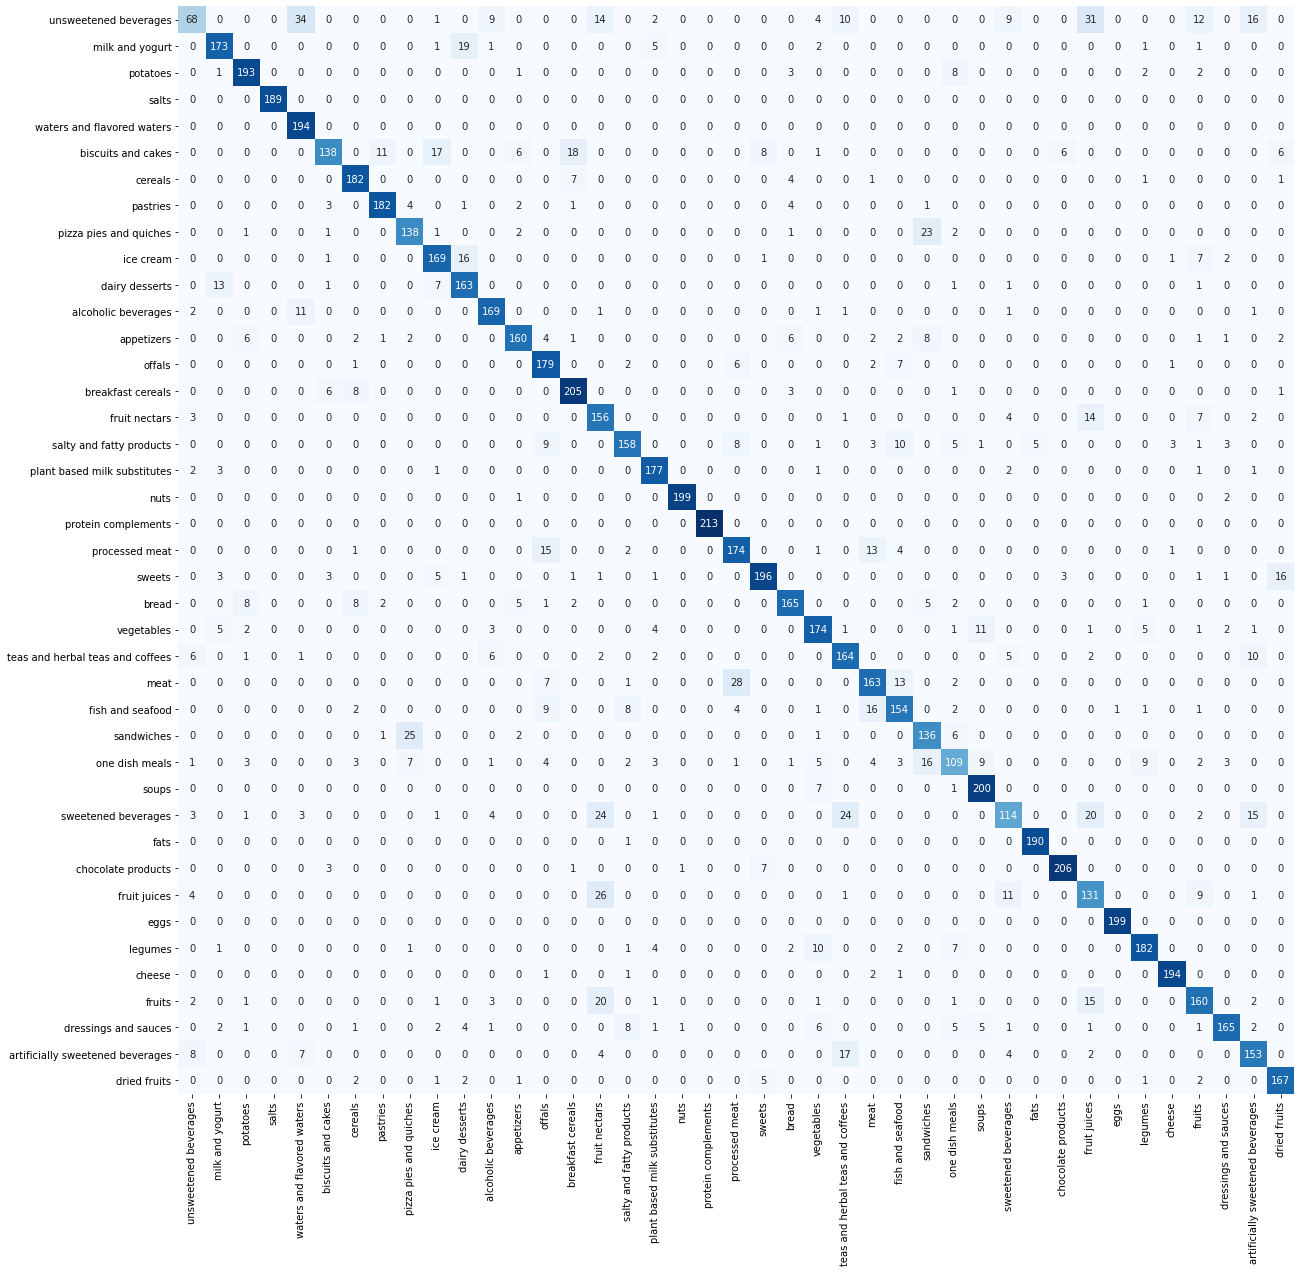

In [84]:
cm = confusion_matrix(Y_test, Y_hat, labels = Y_test.unique())

fig, ax = plt.subplots(figsize = (20,20))

sns.heatmap(
    data = cm,
    cmap = "Blues",
    xticklabels = Y_test.unique(),
    yticklabels = Y_test.unique(),
    cbar = False,
    annot = True,
    fmt = "d",
    annot_kws = {"size":10}
)

plt.show()

Les résultats étant satisfaisants, nous utilisons l'algorithme conçu pour prédire les valeurs manquantes (`unknown`) dans les sous-catégories.

In [85]:
predict_map = (FoodData[group_field] == 'unknown')|(FoodData[group_field].isna())
FoodData.loc[predict_map, group_field] = knn_model.predict(numeric_data_scaled[predict_map])

Sur cette base, et en utilisant le tableau généré en fin de 2.4.4., nous complétons également les valeurs manquantes dans les catégories.

In [86]:
replace_map = (FoodData['pnns_groups_1'] == 'unknown')|(FoodData['pnns_groups_1'].isna())
FoodData.loc[replace_map, 'pnns_groups_1'] = FoodData.loc[replace_map, group_field].apply(set_pnns_groups_1)

### 3.3.4. Quantités manquantes

Enfin, nous pouvons désormais compléter les valeurs manquantes de quantités de produits. Pour ce faire, nous allons attribuer à chaque valeur manquante le mode associé à la sous-catégorie du produit, en utilisant la fonction `SimpleImputer()` de nouveau.

In [87]:
def na_freq_replacer(data, group_field, numeric_fields):
    
    '''
    Fonction rendant une matrice dont les valeurs manquantes ont été complétées à l'aide d'un SimpleImputer().
    
    Paramètres:
    -----------
    - data : dataframe dont certaines données manquantes doivent être estimées.
    - group_field : str représentant le nom de la colonne de data contenant les catégories selon lesquelles data doit être découpée avant d'appliquer le SimpleImputer() à chacune d'entre elles.
    - numeric_fields : itérable ou str contenant les noms des colonnes contenant les données à utiliser pour l'SimpleImputer()
    
    Résultat:
    ---------
    dataframe contenant les valeurs numériques, sur les colonnes numeric_field, dont les valeurs manquantes ont été imputées.
    '''
    
    numeric_fields = pd.Series(numeric_fields)
    fields = np.append(np.array(group_field),numeric_fields)
    data = data.loc[:,fields]
    
    imp = SimpleImputer(strategy = 'most_frequent')
    
    for group in data[group_field].unique():
        
        data_extract = data.loc[data[group_field] == group, numeric_fields]

        freq_replacer = imp.fit_transform(data_extract)

        data.loc[data[group_field] == group,numeric_fields] = freq_replacer
    
    return data.loc[:,numeric_fields]

In [88]:
FoodData.loc[:,'quantity'] = na_freq_replacer(FoodData, group_field, 'quantity')

## 3.4. Analyse en Composantes Principales

Nous pouvons maintenant réaliser une analyse en composantes principales (ACP) sur les indicateurs numériques définis précédemment. Celle-ci pourrait nous permettre une réduction dimensionnelle si un nombre limité de dimensions composites permet d'expliquer une part suffisante de la variance totale de notre base de données.

In [89]:
from sklearn.decomposition import PCA

In [90]:
acp_data = FoodData[numeric_fields]

In [91]:
X = acp_data.values
names = acp_data.index
features = acp_data.columns

In [92]:
X_scaled = StandardScaler().fit_transform(X)

In [93]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [94]:
scree = pca.explained_variance_ratio_*100

Nous cherchons à visualiser l'éboulis des valeurs propres, afin d'observer la part de variance expliquée par l'inclusion de dimensions composites successives.

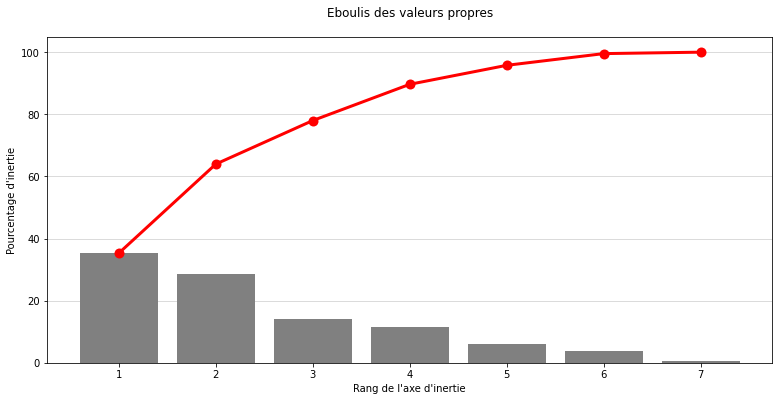

In [95]:
fig, ax = plt.subplots(figsize = (13,6))

sns.barplot(
    x = np.arange(len(scree))+1,
    y = scree,
    color = 'grey'
)

sns.lineplot(
    x = np.arange(len(scree)),
    y = scree.cumsum(),
    color = 'red',
    marker='o',
    markeredgewidth = 0,
    markersize = 10,
    linewidth = 3
)

ax.set_axisbelow(True)

ax.grid(visible = True, axis = "y", color = 'lightgrey')

ax.set_title("Eboulis des valeurs propres", pad = 20)

ax.set_xlabel("Rang de l'axe d'inertie")
ax.set_ylabel("Pourcentage d'inertie")

plt.savefig('figures/valeurs_propres.png', format = 'png', bbox_inches = 'tight')

plt.show()

In [96]:
kaiser_thresh = 1 / len(numeric_fields)
n_p_comp = sum(pca.explained_variance_ratio_>=kaiser_thresh)

In [97]:
display(Markdown(f"Nous pouvons voir qu'au delà de {n_p_comp} composantes principales, aucune composante n'explique plus de {kaiser_thresh:.1%} de la variance, ce qui correspond au critère de Kaiser. Nous ne retenons donc que ces composantes pour la suite de l'analyse."))

Nous pouvons voir qu'au delà de 2 composantes principales, aucune composante n'explique plus de 14.3% de la variance, ce qui correspond au critère de Kaiser. Nous ne retenons donc que ces composantes pour la suite de l'analyse.

Nous pouvons ensuite visualiser le cercle des corrélations entre ces 2 dimensions, afin d'estimer ce qu'elles représentent.

In [98]:
X_projected = pca.transform(X)

In [99]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    
    '''
    Fonction permettant une représentation graphique de la projection des indicateurs
    dans le cercle des corrélations formé par les 2 vecteurs de rang [n1, n2] définis en axis_ranks
    '''    
    
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(7,7))

            # Limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Flèches
            # Si > 30 flèches, flèches simplifiées
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Affichage des noms des variables si saisies  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='10', ha='center', va='center', rotation=label_rotation, color="black")
            
            # Affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='lightgrey', ls='--', linewidth = 1)
            plt.plot([0, 0], [-1, 1], color='lightgrey', ls='--', linewidth = 1)

            # Nom des axes, avec le pourcentage d'inertie expliqué par l'axe
            plt.xlabel(f'F{d1+1} ({pca.explained_variance_ratio_[d1]:.1%})')
            plt.ylabel(f'F{d2+1} ({pca.explained_variance_ratio_[d2]:.1%})')

            plt.title(f"Cercle des corrélations (F{d1+1} et F{d2+1})", pad = 20)
            
            plt.savefig(f'figures/pca_circles_F{d1+1}_F{d2+1}.png', format = 'png', bbox_inches = 'tight')
            
            plt.show(block=False)

In [100]:
pcs = pca.components_

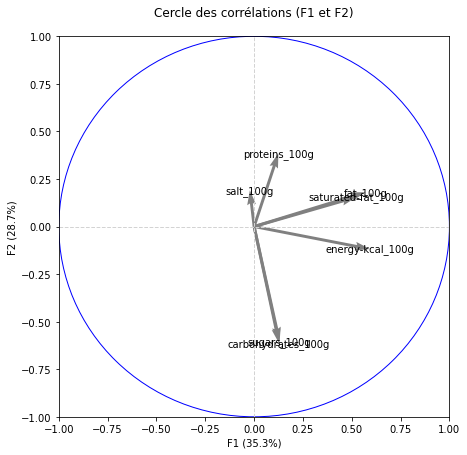

In [101]:
display_circles(pcs, n_p_comp, pca, [(0,1)], features)

Nous pouvons analyser ce que représentent les 2 nouvelles dimensions F1 et F2 :
- F1 représente l'apport énergétique de l'aliment (graisses et apport énergétiques y sont très fortement représentés)
- F2 distingue les aliments à fort apport en glucides (valeurs négatives où sucres et glucides sont très présents) des autres aliments

Bien que cette analyse apporte des informations intéressantes, l'application que nous souhaitons concevoir nécessite d'utiliser chacun des indicateurs de la base. Par ailleurs, le nombre total d'indicateurs utilisés ne nécessite pas de réduction dimensionnelle pour l'utilisation qui sera faite de la base de données. Nous conservons donc tous nos indicateurs à ce stade.

## 3.5. Ajout de colonnes complémentaires

Pour les besoins de notre application, nous ajoutons 2 colonnes à la base de données:
- Poids pour 100g de graisses non-saturées (par différence entre graisses et graisses saturées)
- Poids pour 100g de glucides (hors sucres) (par différence entre glucides et sucres)

In [102]:
FoodData['non-saturated-fat_100g'] = FoodData['fat_100g']-FoodData['saturated-fat_100g']
FoodData['other-carbohydrates_100g'] = FoodData['carbohydrates_100g']-FoodData['sugars_100g']

## 3.6. Enregistrement de la base de données

In [103]:
display(Markdown(f"La base de données finale que nous utiliserons contient {FoodData.shape[0]:,d} lignes et {FoodData.shape[1]:,d} colonnes."))

La base de données finale que nous utiliserons contient 360,538 lignes et 19 colonnes.

In [104]:
FoodData.isna().sum()/FoodData.shape[0]

code                        0.000000
url                         0.000000
last_modified_datetime      0.000000
image_small_url             0.032934
product_name                0.002959
quantity                    0.000000
pnns_groups_1               0.000000
pnns_groups_2               0.000000
nutriscore_grade            0.133143
energy-kcal_100g            0.000000
fat_100g                    0.000000
saturated-fat_100g          0.000000
carbohydrates_100g          0.000000
sugars_100g                 0.000000
proteins_100g               0.000000
salt_100g                   0.000000
sodium_100g                 0.000000
non-saturated-fat_100g      0.000000
other-carbohydrates_100g    0.000000
dtype: float64

In [105]:
FoodData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360538 entries, 0 to 360537
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype              
---  ------                    --------------   -----              
 0   code                      360538 non-null  object             
 1   url                       360538 non-null  object             
 2   last_modified_datetime    360538 non-null  datetime64[ns, UTC]
 3   image_small_url           348664 non-null  object             
 4   product_name              359471 non-null  object             
 5   quantity                  360538 non-null  float64            
 6   pnns_groups_1             360538 non-null  object             
 7   pnns_groups_2             360538 non-null  object             
 8   nutriscore_grade          312535 non-null  object             
 9   energy-kcal_100g          360538 non-null  float64            
 10  fat_100g                  360538 non-null  float64            
 11  

In [106]:
FoodData.to_feather('data/FoodData_final.feather')